In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets
from utils.useCMSstyle import *

In [9]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [14]:
import matplotlib as mpl

In [34]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [4]:
# s_tree = Tree(NMSSM_MX_700_MY_400)
b_tree = Tree(QCD_B_List + [TTJets])

In [5]:
pt_bins = np.linspace(0,300,50)
score_bins = np.linspace(0,1,100)
mH_bins = np.linspace(0,300,50)

<Array [[2, 1, 0], [2, 1, ... 1, 0], [2, 1, 0]] type='200259 * var * int64'>

In [22]:
ak.any(s_tree.nn_higgs_signalId == 0, axis=1)

<Array [True, True, True, ... True, False] type='200259 * bool'>

In [28]:
HX_mask = ak.any(s_tree.nn_higgs_signalId[ak.argsort(s_tree.nn_higgs_pt, axis=1)] == 0, axis=1)
H1_mask = ak.any(s_tree.nn_higgs_signalId[ak.argsort(s_tree.nn_higgs_pt, axis=1)] == 1, axis=1)
H2_mask = ak.any(s_tree.nn_higgs_signalId[ak.argsort(s_tree.nn_higgs_pt, axis=1)] == 2, axis=1)

H3_mask = HX_mask & H1_mask & H2_mask

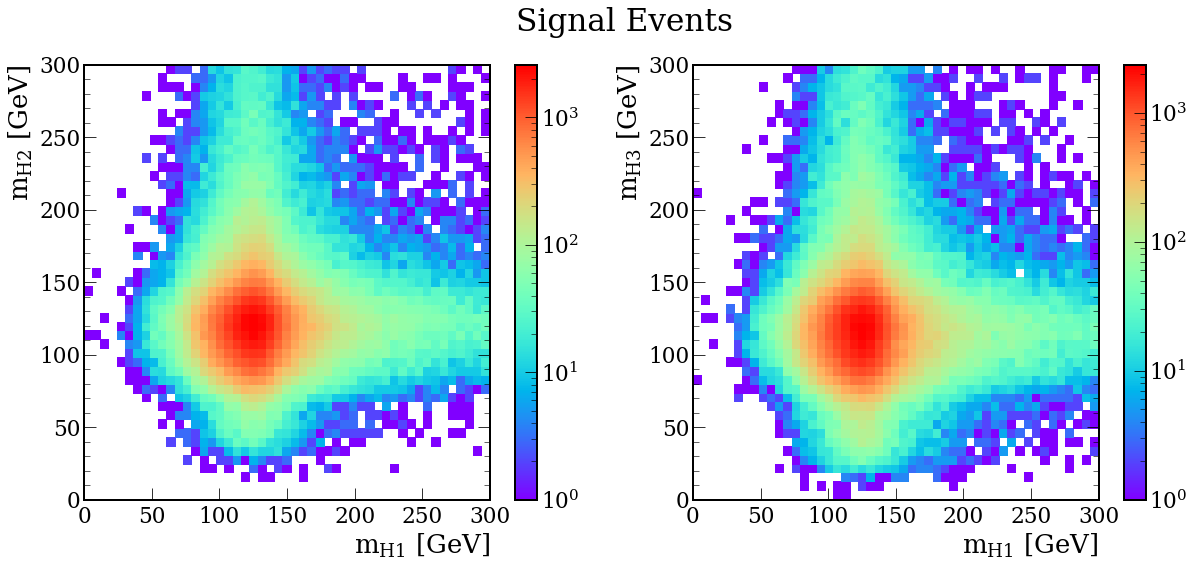

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax = axs[0]
n, x, y, im = ax.hist2d(s_tree.nn_higgs_m[:,0].to_numpy(), s_tree.nn_higgs_m[:,1].to_numpy(), norm=mpl.colors.LogNorm(), bins=(mH_bins, mH_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{H1}$ [GeV]')
ax.set_ylabel(r'$m_{H2}$ [GeV]')
fig.colorbar(im, ax=ax)

ax = axs[1]
n, x, y, im = ax.hist2d(s_tree.nn_higgs_m[:,0].to_numpy(), s_tree.nn_higgs_m[:,2].to_numpy(), norm=mpl.colors.LogNorm(), bins=(mH_bins, mH_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{H1}$ [GeV]')
ax.set_ylabel(r'$m_{H3}$ [GeV]')
fig.colorbar(im, ax=ax)

fig.suptitle('Signal Events')

fig.savefig('signal_nn_higgs_mass.pdf')

In [33]:
n1_mass_cut = 0
n2_mass_cut = 0
n3_mass_cut = 0
n_mass_cut = 0

bkg_X1_n = np.zeros_like(n)
bkg_X2_n = np.zeros_like(n)
for bkg_mH, scale, bkg_HpT in zip(b_tree.nn_higgs_m, b_tree.scale, b_tree.nn_higgs_pt):
    higgs_m = bkg_mH[ak.argsort(bkg_HpT, axis=1)]
    cut_mask = abs(higgs_m - 125) < 
    nX1, ex, ey = np.histogram2d(bkg_mH[:,0].to_numpy(), bkg_mH[:,1].to_numpy(), bins=(mH_bins, mH_bins))
    nX2, ex, ey = np.histogram2d(bkg_mH[:,0].to_numpy(), bkg_mH[:,2].to_numpy(), bins=(mH_bins, mH_bins))
    bkg_X1_n += nX1*scale
    bkg_X2_n += nX2*scale

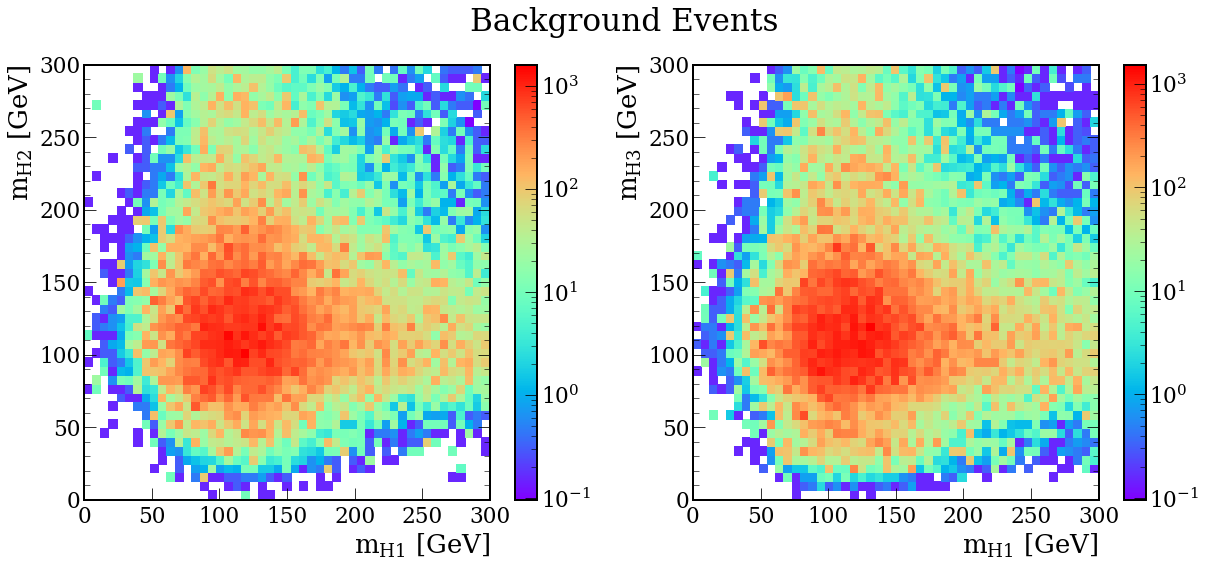

In [62]:
x_mH = x_bins(mH_bins)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax = axs[0]
n, x, y, im = ax.hist2d(np.repeat(x_mH, 49), np.tile(x_mH, 49), weights=bkg_X1_n.flatten(), norm=mpl.colors.LogNorm(), bins=(mH_bins, mH_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{H1}$ [GeV]')
ax.set_ylabel(r'$m_{H2}$ [GeV]')
fig.colorbar(im, ax=ax)

ax = axs[1]
n, x, y, im = ax.hist2d(np.repeat(x_mH, 49), np.tile(x_mH, 49), weights=bkg_X2_n.flatten(), norm=mpl.colors.LogNorm(), bins=(mH_bins, mH_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{H1}$ [GeV]')
ax.set_ylabel(r'$m_{H3}$ [GeV]')
fig.colorbar(im, ax=ax)

fig.suptitle('Background Events')

fig.savefig('bkgd_nn_higgs_mass.pdf')

In [43]:
bkg_pt_n = np.zeros_like(pt_bins[:-1])
for bkg_pt, scale in zip(b_tree.nn_jet_pt, b_tree.scale):
    n, e = np.histogram(bkg_pt[:,0].to_numpy(), bins=pt_bins)
    bkg_pt_n += n*scale

In [74]:

bkg_3s_n = np.zeros_like(score_bins[:-1])
for bkg_3s, scale in zip(b_tree.b_3d_score, b_tree.scale):
    n, e = np.histogram(bkg_3s.to_numpy(), bins=score_bins)
    bkg_3s_n += n*scale

In [66]:

bkg_mH_n = np.zeros_like(mH_bins[:-1])
for bkg_mH, scale in zip(b_tree.nn_higgs_m, b_tree.scale):
    n, e = np.histogram(ak.flatten(bkg_mH).to_numpy(), bins=mH_bins)
    bkg_mH_n += n*scale

In [113]:
from utils.plotter import plot
import matplotlib.pyplot as plt

In [175]:
n_pass_3s = np.zeros_like(score_bins[:-1])
N_pass_3s = np.zeros_like(score_bins[:-1])
n_pass_3s_bkg = np.zeros_like(score_bins[:-1])
N_pass_3s_bkg = np.zeros_like(score_bins[:-1])
for i,score_cut in enumerate(score_bins[:-1]):
    n_pass_3s[i] = np.sum(s_tree.b_3d_score > score_cut)/len(s_tree.b_3d_score)
    N_pass_3s[i] = np.sum(s_tree.b_3d_score > score_cut)*s_tree.scale
    numer = 0
    denom = 0
    for j,samp in enumerate(b_tree.b_3d_score):
        # print(np.sum(samp > score_cut), "/", len(samp))
        numer += np.sum(samp > score_cut)*b_tree.scale[j]
        denom += len(samp)*b_tree.scale[j]
    n_pass_3s_bkg[i] = numer/denom
    N_pass_3s_bkg[i] = numer

In [128]:
bkgd_3s_list = [arr.to_numpy() for arr in b_tree.b_3d_score]

In [109]:
np.sum(s_tree.b_3d_score > 0.8)*s_tree.scale

6535.30204986708

In [181]:
b_tree.scale

array([2.60255677e+02, 8.86679273e+01, 9.60683031e+00, 9.60484013e+00,
       2.09229090e+00, 1.55271391e-01, 9.61740820e-02, 3.55652778e+02,
       9.75258670e+01, 2.21754529e+01, 7.24457232e+00, 4.22703323e+00,
       1.58965609e+00, 6.07166650e-01])

In [182]:
b_tree.nevents

[9, 913, 5634, 2317, 2903, 4222, 1243, 1, 213, 1009, 1791, 1002, 407, 288]

In [171]:
total_bkg_events = np.array((b_tree.nevents))*np.array((b_tree.scale))
total_bkg_events = total_bkg_events.sum()

In [183]:
total_bkg_events

228060.5006716075

In [174]:
N_pass_3s_bkg.sum()/total_bkg_events

0.04938576088989506

In [170]:
len(s_tree.b_3d_score)*s_tree.scale

7536.425558453339

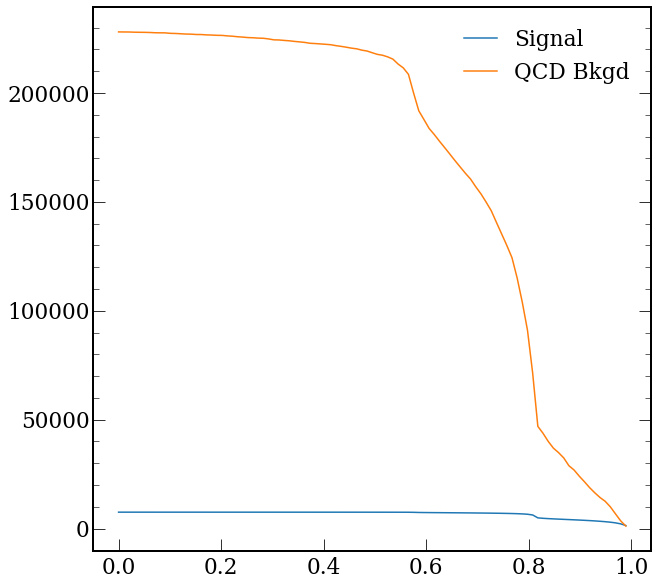

In [180]:
plt.plot(score_bins[:-1], N_pass_3s, label='Signal')
plt.plot(score_bins[:-1], N_pass_3s_bkg, label='QCD Bkgd')
plt.legend()

In [85]:
n_s, e = np.histogram(s_tree.b_3d_score.to_numpy(), bins=score_bins)
n_s = n_s*s_tree.scale

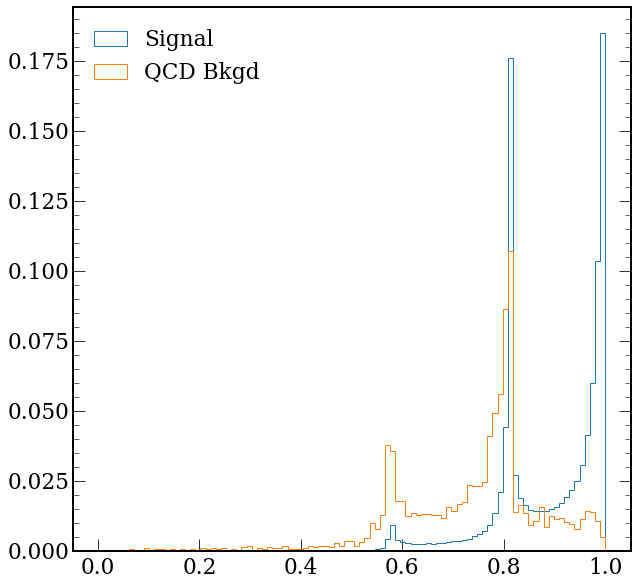

In [88]:
x = (score_bins[:-1] + score_bins[1:])/2
fig, ax = plt.subplots()

# for n in bkg_pt_n:
_ = plot(x=x, weights=n_s/n_s.sum(), bins=score_bins, fig=fig, ax=ax, stacked=True, label='Signal')
_ = plot(x=x, weights=bkg_3s_n/bkg_3s_n.sum(), bins=score_bins, fig=fig, ax=ax, stacked=True, label='QCD Bkgd')
ax.legend(loc=2)

s1 
s2 
s3 
s = sqrt(s1^2 + s2^2 + s3^2)/3
plot s1 vs s2
plot s1 vs s3

In [93]:
s2, mjj, s_mask, n_evt = s_tree.get_2j_input()
# s_mask = s_tree.get_2j_input()

In [105]:
s_mask_evt = ak.unflatten(s_mask, n_evt)
score_evt = ak.unflatten(s2[:,0], n_evt)

In [106]:
score_evt

<Array [[0.0855, 0.995, ... 0.00113, 0.00226]] type='200259 * var * float32'>

In [103]:
s_mask_evt

<Array [[False, True, False, ... False, False]] type='200259 * var * bool'>

In [111]:
sorted_scores_true = ak.sort(score_evt[s_mask_evt], axis=1)[:,::-1]

In [122]:
sorted_scores_true = sorted_scores_true[ak.count(sorted_scores_true, axis=1) == 3]

In [128]:
s = np.sqrt(sorted_scores_true[:,0]**2 + sorted_scores_true[:,1]**2 + sorted_scores_true[:,2]**2)/3

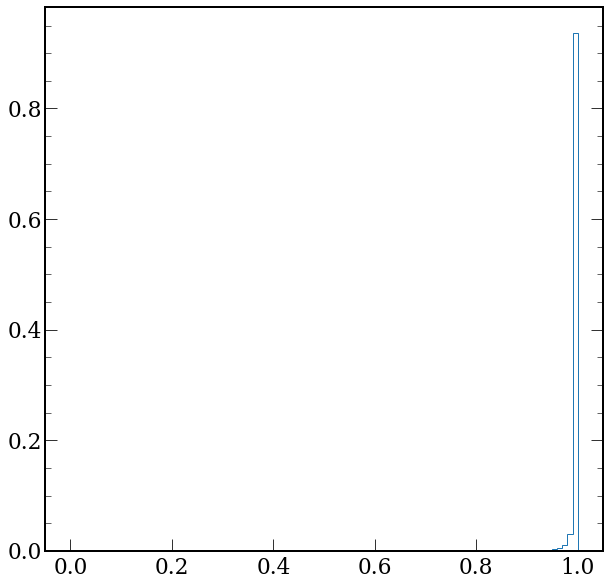

In [134]:
fig, ax = plt.subplots()
_ = plot(sorted_scores_true[:,0], fig=fig, ax=ax, bins=score_bins, density=1)
_ = plot(sorted_scores_true[:,1], fig=fig, ax=ax, bins=score_bins, density=1)
_ = plot(sorted_scores_true[:,2], fig=fig, ax=ax, bins=score_bins, density=1)
_ = plot(s, fig=fig, ax=ax, bins=score_bins, density=1)


In [18]:
mjj = ak.flatten(mjj).to_numpy()

In [ ]:
s2 = s2[~np.isnan(mjj)]
s_mask = s_mask[~np.isnan(mjj)][:,0]
mjj = mjj[~np.isnan(mjj)]

In [63]:
n, xedges, yedges, im = plt.hist2d(mjj, s2, norm=mpl.colors.LogNorm(), bins=(mH_bins, score_bins), cmap='rainbow')
plt.xlabel(r'$m_{2j}$ [GeV]')
plt.ylabel('2j Score')
plt.colorbar(im)
# plt.savefig('score_v_mjj_2j.pdf', bbox_inches='tight')

NameError: name 'mjj' is not defined

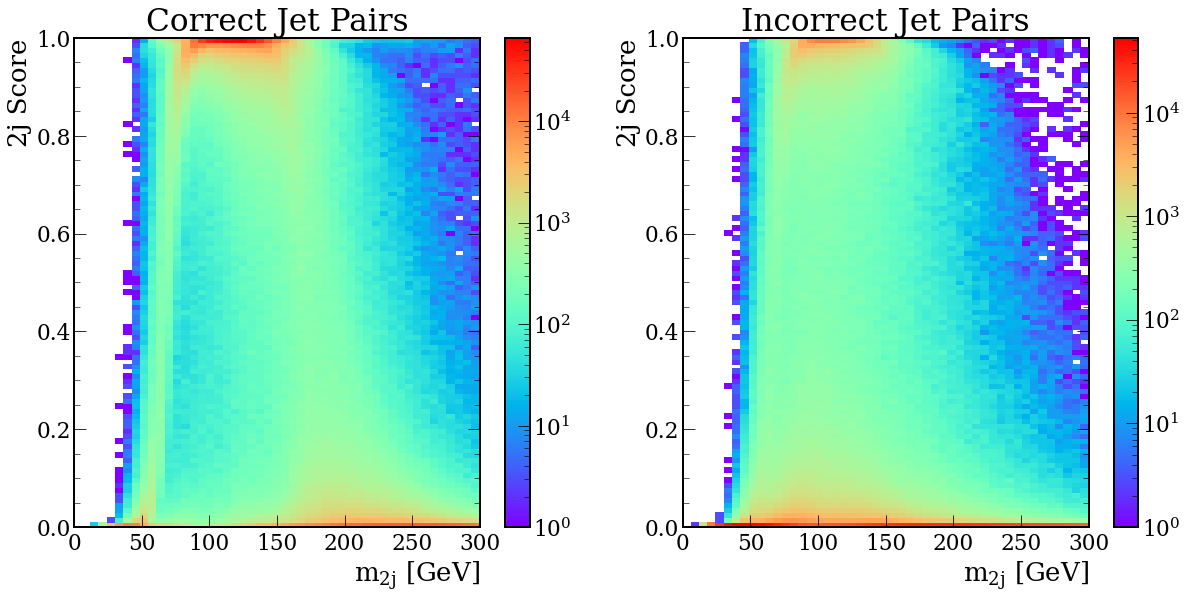

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

ax = axs[0]
n, xedges, yedges, im = ax.hist2d(mjj[s_mask], s2[:,0][s_mask], norm=mpl.colors.LogNorm(), bins=(mH_bins, score_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{2j}$ [GeV]')
ax.set_ylabel('2j Score')
ax.set_title('Correct Jet Pairs')
fig.colorbar(im, ax=ax)
# plt.colorbar(im)

ax = axs[1]
n, xedges, yedges, im = ax.hist2d(mjj[~s_mask], s2[:,0][~s_mask], norm=mpl.colors.LogNorm(), bins=(mH_bins, score_bins), cmap='rainbow')
ax.set_xlabel(r'$m_{2j}$ [GeV]')
ax.set_ylabel('2j Score')
ax.set_title('Incorrect Jet Pairs')
fig.colorbar(im, ax=ax)

fig.savefig('score_v_mjj_2j_correct_incorrect.pdf', bbox_inches='tight')

In [50]:
s2[:,0] > 0.8

array([False,  True,  True, ..., False, False, False])

Text(0, 1, 'Events')

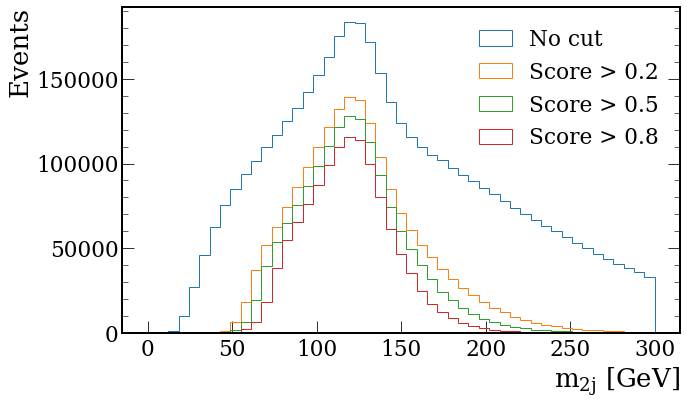

In [79]:
fig, ax, n, b = plot(mjj, bins=mH_bins, label='No cut')
_ = plot(mjj[s2[:,0] > 0.2], bins=mH_bins, label=r'Score > 0.2', fig=fig, ax=ax)
_ = plot(mjj[s2[:,0] > 0.5], bins=mH_bins, label=r'Score > 0.5', fig=fig, ax=ax)
_ = plot(mjj[s2[:,0] > 0.8], bins=mH_bins, label=r'Score > 0.8', fig=fig, ax=ax)
ax.set_xlabel(r'$m_{2j}$ [GeV]')
ax.set_ylabel('Events')
# fig.savefig('dijet_mass_score_cuts.pdf', bbox_inches='tight')

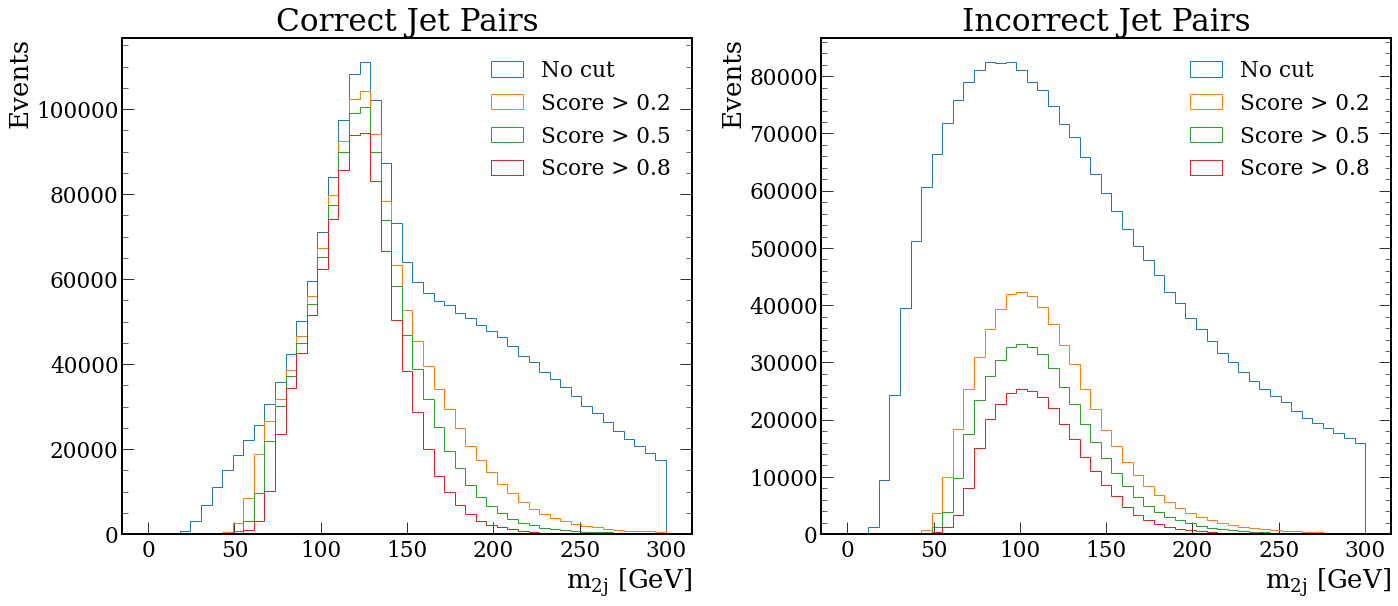

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

ax = axs[0]
_ = plot(mjj[s_mask], bins=mH_bins, label='No cut', fig=fig, ax=ax)
_ = plot(mjj[s_mask][s2[:,0][s_mask] > 0.2], bins=mH_bins, label=r'Score > 0.2', fig=fig, ax=ax)
_ = plot(mjj[s_mask][s2[:,0][s_mask] > 0.5], bins=mH_bins, label=r'Score > 0.5', fig=fig, ax=ax)
_ = plot(mjj[s_mask][s2[:,0][s_mask] > 0.8], bins=mH_bins, label=r'Score > 0.8', fig=fig, ax=ax)
ax.set_xlabel(r'$m_{2j}$ [GeV]')
ax.set_ylabel('Events')
ax.set_title('Correct Jet Pairs')

ax = axs[1]
_ = plot(mjj[~s_mask], bins=mH_bins, label='No cut', fig=fig, ax=ax)
_ = plot(mjj[~s_mask][s2[:,0][~s_mask] > 0.2], bins=mH_bins, label=r'Score > 0.2', fig=fig, ax=ax)
_ = plot(mjj[~s_mask][s2[:,0][~s_mask] > 0.5], bins=mH_bins, label=r'Score > 0.5', fig=fig, ax=ax)
_ = plot(mjj[~s_mask][s2[:,0][~s_mask] > 0.8], bins=mH_bins, label=r'Score > 0.8', fig=fig, ax=ax)
ax.set_xlabel(r'$m_{2j}$ [GeV]')
ax.set_ylabel('Events')
ax.set_title('Incorrect Jet Pairs')

plt.tight_layout()
fig.savefig('dijet_mass_score_cuts_correct_incorrect.pdf', bbox_inches='tight')